In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df=pd.read_csv("/content/data.csv")

In [55]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [56]:
df.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


In [57]:
df = df.drop(["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"], axis="columns")

In [58]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [59]:
df.rename(columns={"Engine HP": "HP",
"Engine Cylinders" : "Cylinders",
"Transmission Type" : "Transmission",
"Driven_Wheels" : "Drive Mode",
"highway MPG" : "MPG-H",
"city mpg" : "MPG-C",
"MSRP" : "Price"
}, inplace=True)
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [60]:
df.shape

(11914, 10)

In [61]:
df[df.duplicated()].shape[0]

989

In [62]:
df=df.drop_duplicates()

In [63]:
df.shape

(10925, 10)

In [64]:
df.describe()

,Year,HP,Cylinders,MPG-H,MPG-C,Price
count,10925.000000,10856.000000,10895.000000,10925.000000,10925.000000,1.092500e+04
mean,2010.917895,254.399503,5.668196,26.654737,19.770801,4.249660e+04
std,7.016102,109.771351,1.799464,9.031109,9.259532,6.205353e+04
min,1990.000000,55.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,173.000000,4.000000,22.000000,16.000000,2.199500e+04
50%,2015.000000,240.000000,6.000000,25.000000,18.000000,3.092000e+04
75%,2016.000000,303.000000,6.000000,30.000000,22.000000,4.330000e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


In [65]:
df.isnull().sum()

,0
Make,0
Model,0
Year,0
HP,69
Cylinders,30
Transmission,0
Drive Mode,0
MPG-H,0
MPG-C,0
Price,0


In [66]:
df=df.dropna()

In [67]:
df.isnull().sum()

,0
Make,0
Model,0
Year,0
HP,0
Cylinders,0
Transmission,0
Drive Mode,0
MPG-H,0
MPG-C,0
Price,0


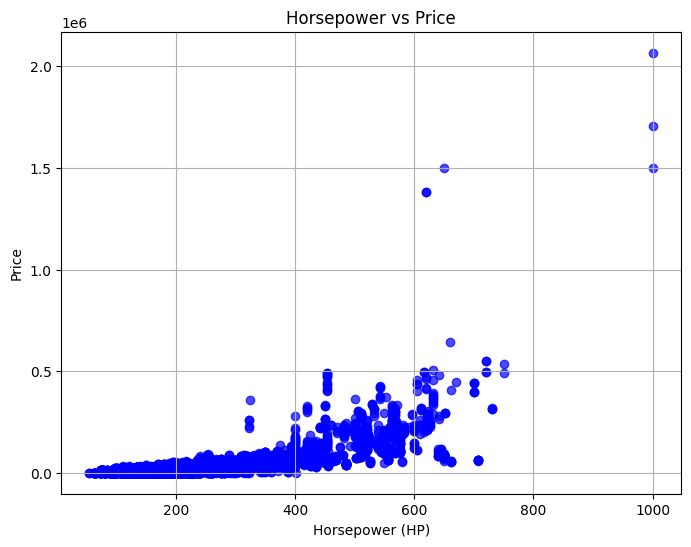

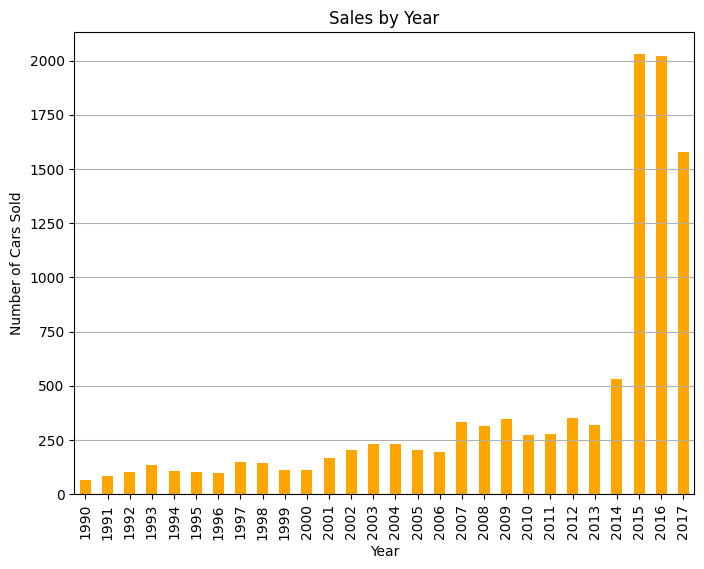

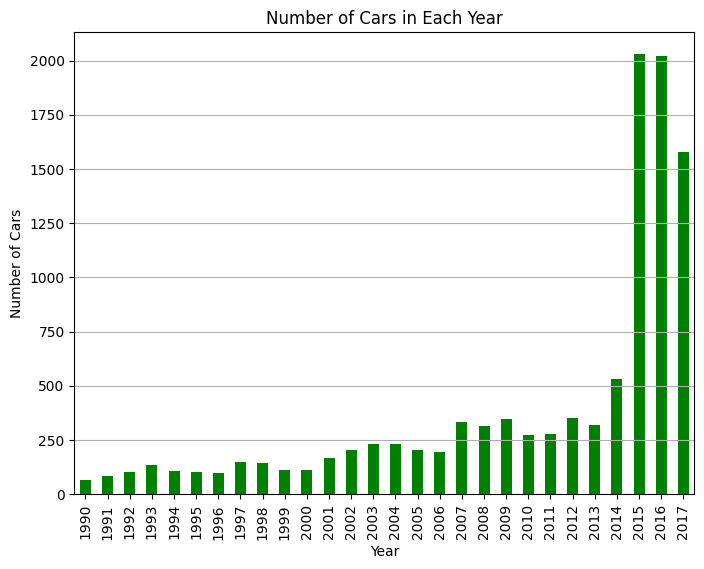

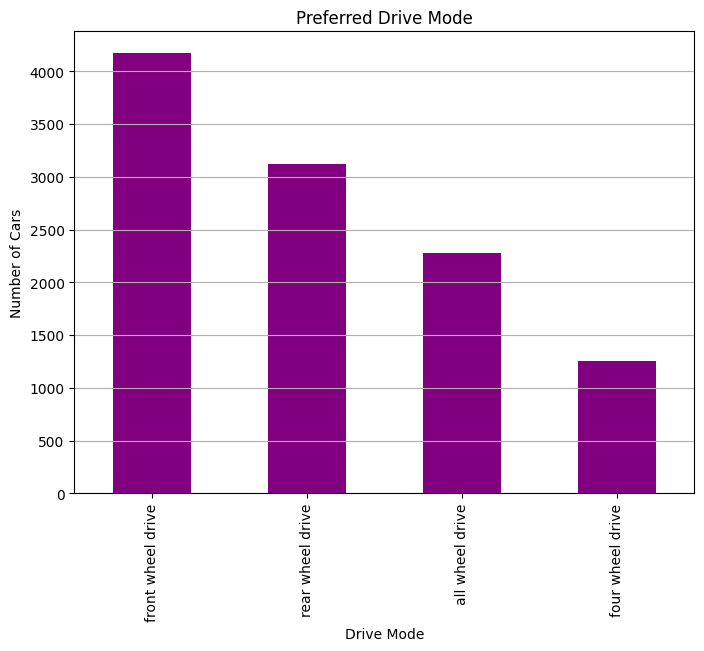

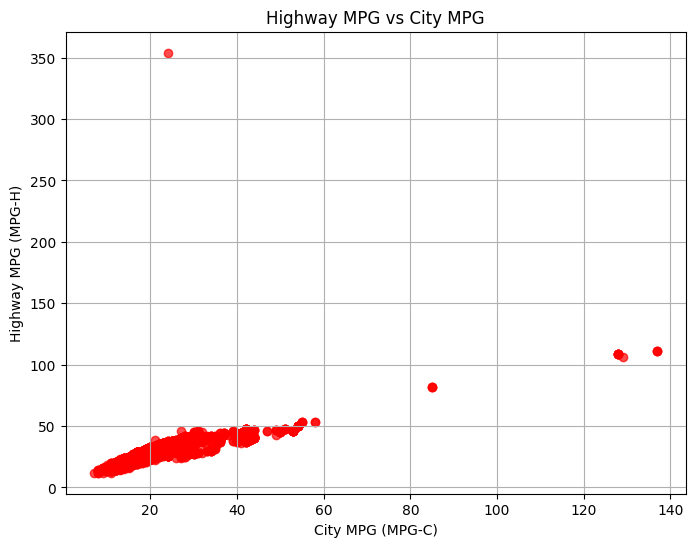

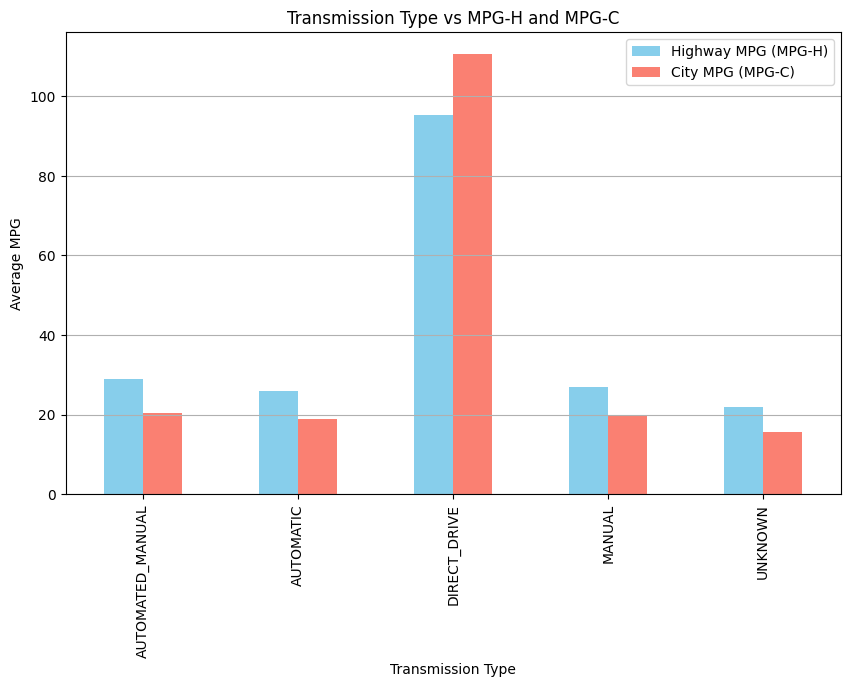

In [68]:
# 1. Horsepower (HP) vs Price
plt.figure(figsize=(8, 6))
plt.scatter(df['HP'], df['Price'], alpha=0.7, c='blue')
plt.title('Horsepower vs Price')
plt.xlabel('Horsepower (HP)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# 2. Sales by Year
sales_by_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sales_by_year.plot(kind='bar', color='orange')
plt.title('Sales by Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars Sold')
plt.grid(axis='y')
plt.show()

# 3. Number of Cars in Each Year
plt.figure(figsize=(8, 6))
df['Year'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Number of Cars in Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.grid(axis='y')
plt.show()

# 4. Preferred Drive Mode (most common Drive Mode)
drive_mode_counts = df['Drive Mode'].value_counts()
plt.figure(figsize=(8, 6))
drive_mode_counts.plot(kind='bar', color='purple')
plt.title('Preferred Drive Mode')
plt.xlabel('Drive Mode')
plt.ylabel('Number of Cars')
plt.grid(axis='y')
plt.show()

# 5. Highway MPG (MPG-H) vs City MPG (MPG-C)
plt.figure(figsize=(8, 6))
plt.scatter(df['MPG-C'], df['MPG-H'], alpha=0.7, c='red')
plt.title('Highway MPG vs City MPG')
plt.xlabel('City MPG (MPG-C)')
plt.ylabel('Highway MPG (MPG-H)')
plt.grid(True)
plt.show()

# 6. Transmission Type vs MPG-H and MPG-C
transmission_groups = df.groupby('Transmission')[['MPG-H', 'MPG-C']].mean()
transmission_groups.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Transmission Type vs MPG-H and MPG-C')
plt.xlabel('Transmission Type')
plt.ylabel('Average MPG')
plt.grid(axis='y')
plt.legend(['Highway MPG (MPG-H)', 'City MPG (MPG-C)'])
plt.show()

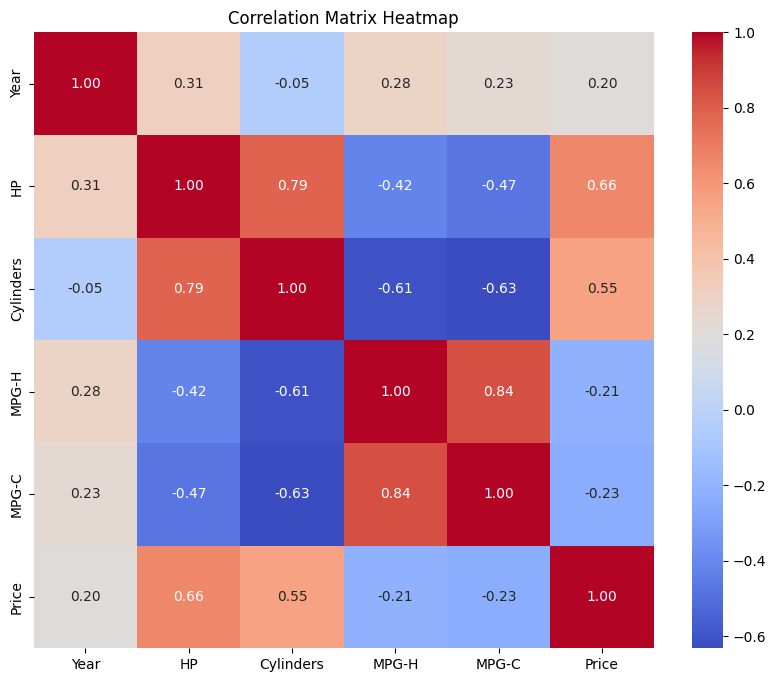

In [69]:
# 7. Filter numeric columns and calculate correlation matrix
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()

# 8. Plot a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()
